# Pandas Module

## Introduction

Pandas is built on top of Numpy and is the most popular Python library for handling tabular data. The library is powerful and extensive, so here we will cover some of the basic features. The most popular module of the **Pandas** library is probably *DataFrames*. We will learn how to create a daframe, retrieve data, replace missing values, and compute simple statistics.

The concept of the **Pandas** library is that we can call data stored in rows or columns by name. This allows us to handle data without having to remember the exact location of a column.

Pandas DataFrame excels at loading tabular data from comma-separated value files (.csv) and text files (.txt). Files typically have a single line of column headers and each column has the same data type.


In [6]:
# Import modules
import pandas as pd
import numpy as np


## Create DataFrame from existing variable

After importing the module we have two possible directions. We import data from a file or we convert an existing variable into a Pandas DataFrame. Here we will create a simple DatFrame to learn the basics. This way we will be able to display the result of our operations without worrying about extensive datasets.

Let's create a dictionary with some weather data and missing values (represented by `-9999`).

In [7]:
data = {'dayOfYear': [1,2,3,4,5], 
        'windSpeed': [2.2, 3.2, -9999.0, 4.1, 2.9], 
        'windDirection': ['E', 'NW', 'NW', 'N', 'S'],
        'precipitation': [0, 18, 25, 2, 0]}


The next step consists of converting the dictionary into a Pandas DataFrame. This is straight forward using the DataFrame method of the Pandas modules `pd.DataFrame()`

In [9]:
# Convert dictionary into DataFrame
df = pd.DataFrame(data)
df.head()


,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18
2,3,-9999.0,NW,25
3,4,4.1,N,2
4,5,2.9,S,0


>To display the DataFrame content simply use the `head()` and `tail()` methods.
As an alternative you can use the `print()` function or type the name of the DataFrame and hit `ctrl + Enter`. Note that by default Jupyter Lab highlights the different table rows when using the second option, so for readability purposes I will use the second option from now on.

Dissecting the DataFrame above we find the following main components:

1. header row containing column names

2. index (the left-most column with numbers from 0 to 4) is equivalent to a row name.

3. Each column has data of the same type.

## Basic methods and properties

Pandas DataFrame has dedicated functions to display a limited number of heading and tailing rows.

In [84]:
df.head(3) # First three rows

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18
2,3,-9999.0,NW,25


In [85]:
df.tail(3) # Last three rows

,dayOfYear,windSpeed,windDirection,precipitation
2,3,-9999.0,NW,25
3,4,4.1,N,2
4,5,2.9,S,0


To start handling our data we need to learn how to retrieve data from the Pandas DataFrame. If we don't know the column names of the dataset we can print them using the column property. We can also inspect the data type of each column as well as its total number of elements and shape.

In [86]:
df.columns  # Column names

Index(['dayOfYear', 'windSpeed', 'windDirection', 'precipitation'], dtype='object')

In [87]:
df.dtypes  # Data type for each column

dayOfYear          int64
windSpeed        float64
windDirection     object
precipitation      int64
dtype: object

In [88]:
df.size  # Total number of elements

20

In [89]:
df.shape  # Number of rows and columns

(5, 4)

## Missing values

One of the most common operations when working with data is to handle missing values. Almost every dataset has missing data and there is no universal way of denoting missing values. Most common placeholders are: `NaN`, `NA`, `-99`, `-9999`, `missing`. To find out more about how missing data is represented in your dataset read associated documentation files.

I typically prefer to use `NaN` (personal preference since I also use Matlab frequently). In many datasets missing data may already by imported as NaN or NA, meaning that you can directly use the `fillna()` method without this intermediary step.

To replace missing values we will follow these steps:

1. Identify the cells with `-9999` values. Output will be a logical DataFrame having the same dimensions as `df`.

2. Replace `-9999` with `NaN` values. Note that I'm using `NaN` values from **Numpy**.

3. Check our work using the `isna()` method (optional)

> Pandas offers a machinery to deal with missing data, meaning that it is not necessary to replace these values in order to make computations with the data. We just need to ensure that missing values are in the right format. In some cases an option would be to replace missing data with an estimate value, like using the average of the values immediately above and below or using the average for the entire data (not ideal)using the `fillna()` method. For instance: `df.fillna(df.windSpeed.mean())`


In [90]:
# Step 1: find -9999 values across the entire dataframe

idx_missing = df.isin([-9999])
idx_missing

,dayOfYear,windSpeed,windDirection,precipitation
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False


In [91]:
# Find missing vlaues in only one column
df["windSpeed"] == -9999

0    False
1    False
2     True
3    False
4    False
Name: windSpeed, dtype: bool

In [92]:
# Step 2: Replace missing values with NaN

df[idx_missing] = np.nan
df

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18
2,3,NaN,NW,25
3,4,4.1,N,2
4,5,2.9,S,0


In [93]:
# NaNs are of type float
type(np.nan)

float

In [94]:
# Step 3: Check our work

df.isna()

,dayOfYear,windSpeed,windDirection,precipitation
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False


## Quick statistics

DataFrames have a variety of methods to calculate simple statistics. To obtain an overall summary we can use the `describe()` method.

In [95]:
print(df.describe())              # Summary stats for all columns

       dayOfYear  windSpeed  precipitation
count   5.000000   4.000000         5.0000
mean    3.000000   3.100000         9.0000
std     1.581139   0.787401        11.7047
min     1.000000   2.200000         0.0000
25%     2.000000   2.725000         0.0000
50%     3.000000   3.050000         2.0000
75%     4.000000   3.425000        18.0000
max     5.000000   4.100000        25.0000


In [127]:
# Metric ignoring NaN values
print(df["windSpeed"].max())         # Maximum value for each column
print(df["windSpeed"].mean())        # Average value for each column
print(df["windSpeed"].min())         # Minimum value for each column
print(df["windSpeed"].std())         # Standard deviation value for each column
print(df["windSpeed"].var())         # Variance value for each column
print(df["windSpeed"].median())         # Variance value for each column
print(df["windSpeed"].quantile(0.95))

4.1
3.1
2.2
0.7874007874011809
0.6199999999999997
3.05
3.9649999999999994


In [97]:
print(df.precipitation.cumsum())  # Cumulative sum. Useful to compute cumulative precipitation

0     0
1    18
2    43
3    45
4    45
Name: precipitation, dtype: int64


In [98]:
print(df.windDirection.unique())  # Unique values. Useful to compute unique wind directions

['E' 'NW' 'N' 'S']


## Indexing and slicing


### Using index operator `[]`
To start making computations with need to access the data insde the Pandas DataFrame. Indexing and slicing are useful operations to select portions of data by calling specific rows, columns, or a combination of both. The index operator `[]` is primarily intended to be used with column labels (e.g. `df[columnName]`), however, it can also handle row slices (e.g. `df[rows]`). A common notation useful to understand how the slicing works is as follows:

## Select rows

In [99]:
df[0:3] # First three rows

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18
2,3,NaN,NW,25


## Select columns

We can call individual columns using the `dot` or `bracket` notation. Note that in option 2 there is no `.` between `df` and `['windSpeed']`

In [100]:
df.windSpeed    # Option 1
df['windSpeed'] # Option 2

0    2.2
1    3.2
2    NaN
3    4.1
4    2.9
Name: windSpeed, dtype: float64

To pass more than one row of column you will need to group them in a list.

In [101]:
df[['windSpeed','windDirection']]

,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW
3,4.1,N
4,2.9,S


A common mistake when slicing multiple columns is to forget grouping column names into a list, so the following command will not work:

`df['windSpeed','windDirection']`

## Slicing rows and columns

### Using `iloc` method

`iloc`: Integer-location. `iloc` gets rows (or columns) at specific indexes. It only takes integers as input. **Exclusive of its endpoint**

In [102]:
# Top 3 rows and columns 1 and 2
df.iloc[0:3,[1,2]]

,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW


In [103]:
# Top 2 rows and all columns
df.iloc[0:2,:] # Same as: df.iloc[0:2]

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18


Although a bit more verbose and perhaps less *pythonic*, I prefer to specify `all the columns` using the `:` character. In my opinion this notation is more explicit and clearly states the rows and columns of the slicing operation. So, `df.iloc[0:2,:]` is preferred over `df.iloc[0:2]`.

### Using `loc` method

`loc` gets rows (or columns) with specific labels. **Inclusive of its endpoint**

In [104]:
df.loc[0:2,['windSpeed','windDirection']]

,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW


In [105]:
df.loc[0:1,:]

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18


In [106]:
df.loc[0:2,'windSpeed']  # First three elements of a single column
df.loc[0:2,['windSpeed','windDirection']] # First three elements of multiple columns

,windSpeed,windDirection
0,2.2,E
1,3.2,NW
2,NaN,NW


These statements will not work with `loc`: 

`df.loc[0:2,0:1]`

`df.loc[[0:2],[0:1]]`

## Filter data using boolean indexing

Boolean indexing (a.k.a. logical indexing) consists of creating a boolean array with True/False values as a consequence of conditional statement that can be use to select the rows that meet the specified condition. Logical indexing are often not intuitive for students learning how to program, but are incredibly powerful and I highly encourage its use.

Let's select all the data for days that have wind speed greater than 3 meters per second. We will first select the rows of `df.windSpeed` that are greater than 3 m/s, and then we will use the resulting boolean to slice the DataFrame.

In [107]:
idx = df.windSpeed > 3 # Rows in which the wind speed is greater than 
idx  # Let's inspect the idx variable.

0    False
1     True
2    False
3     True
4    False
Name: windSpeed, dtype: bool

In [108]:
df[idx] # Now let's apply the boolean variable to the dataframe

,dayOfYear,windSpeed,windDirection,precipitation
1,2,3.2,NW,18
3,4,4.1,N,2


In [109]:
df.loc[idx,'windDirection'] # We can also apply the boolean to specific columns

1    NW
3     N
Name: windDirection, dtype: object

It's also possible to write the previous command with the conditional statement in a single line of code. This is fine to do, but sometimes nesting too many conditions can create commands that are hard to understand. I typically recommend storing the boolean results in a new variable that is easier to pass around. This is particularly helpful if you are planning to re-use the boolean in multiple lines of you code.

In [110]:
df.loc[df.windSpeed > 3,'windDirection'] # Same in a single line of code

1    NW
3     N
Name: windDirection, dtype: object

Another popular way of filtering is to check whether an element or group of elements are within a set. If you come from Matlab the following example is similar to the `ismember()` function.

Let's check whether January 1 and January 2 are in the dataframe.

In [111]:
idx_doy = df['dayOfYear'].isin([1,2])  #list(range(1,5))
idx_doy

0     True
1     True
2    False
3    False
4    False
Name: dayOfYear, dtype: bool

In [112]:
df.loc[idx_doy,:] # Select all columns for the selected days of the year

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18


## Pandas dates

In this particular case we have the day of the year to indicate time, however, in many occasions is better to handle dates. Often times dates are already present in the dataset, but if they aren't then we can create and handle dates with Pandas.

In [113]:
dates = pd.date_range('20200101', periods=df.shape[0]) # Used df.shape[0] to find the total number of rows
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [114]:
pd.date_range('20200101', periods=df.shape[0], freq='m') # Specify the frequency to months

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

## Add and remove columns

The `insert()` and `drop()` methods allow us to add or remove columns to/from the DataFrame. The most common use of these functions is as follows:

`df.insert(indexOfNewColumn, nameOfNewColumn, dataArrayOfNewColumn)`

`df.drop(nameOfColumnToBeRemoved)`

In [115]:
df.insert(0, 'dates', dates) # Similar to: df['dates'] = dates
df

,dates,dayOfYear,windSpeed,windDirection,precipitation
0,2020-01-01,1,2.2,E,0
1,2020-01-02,2,3.2,NW,18
2,2020-01-03,3,NaN,NW,25
3,2020-01-04,4,4.1,N,2
4,2020-01-05,5,2.9,S,0


In [116]:
df.drop(columns=['dates'])

,dayOfYear,windSpeed,windDirection,precipitation
0,1,2.2,E,0
1,2,3.2,NW,18
2,3,NaN,NW,25
3,4,4.1,N,2
4,5,2.9,S,0


## Reset DataFrame index

In [117]:
# Replace the index by a variables of our choice
df.set_index('dayOfYear')

,dates,windSpeed,windDirection,precipitation
dayOfYear,,,,
1,2020-01-01,2.2,E,0
2,2020-01-02,3.2,NW,18
3,2020-01-03,NaN,NW,25
4,2020-01-04,4.1,N,2
5,2020-01-05,2.9,S,0


In [120]:
# Reset the index
df.reset_index(0)

,index,dates,dayOfYear,windSpeed,windDirection,precipitation
0,0,2020-01-01,1,2.2,E,0
1,1,2020-01-02,2,3.2,NW,18
2,2,2020-01-03,3,NaN,NW,25
3,3,2020-01-04,4,4.1,N,2
4,4,2020-01-05,5,2.9,S,0


## Pandas <-> Numpy

In [10]:
# Get numpy values from Pandas series
df["windSpeed"].values


array([ 2.200e+00,  3.200e+00, -9.999e+03,  4.100e+00,  2.900e+00])

In [11]:
# For reproducibility
np.random.seed(1) 

# Create some synthetic data
x = np.linspace(0,2*np.pi)
y = np.sin(x)  + np.random.randn(x.size)*0.2


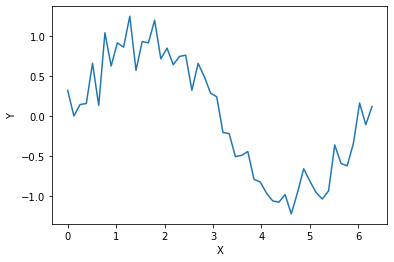

In [13]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [14]:
# Convert numpy array into Pandas series
ypd = pd.Series(y)
print(type(ypd))


<class 'pandas.core.series.Series'>


In [15]:
# Moving average
ypd_smooth_forward = ypd.rolling(5).mean()
ypd_smooth_center = ypd.rolling(5, center=True).mean()


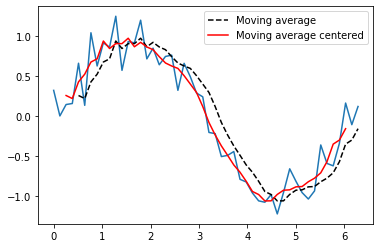

In [17]:
# Show differences in forward and centered moving averages
plt.plot(x,ypd)
plt.plot(x,ypd_smooth_forward, '--k',label='Moving average')
plt.plot(x,ypd_smooth_center, '-r', label='Moving average centered')
plt.legend()
plt.show()


In this case, the selection of a forward or centered moving average affects the timing of maximum and minimum values of the wave. A centered moving average is ideal to maintain thse features in the resulting smoothed timeseries.
